In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets

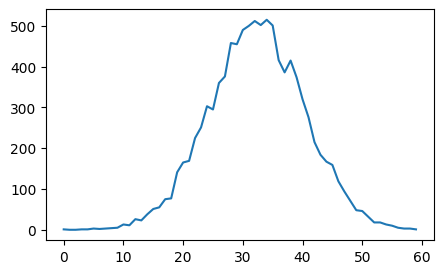

array([  1,   0,   0,   1,   1,   3,   2,   3,   4,   5,  13,  11,  26,
        23,  38,  51,  55,  75,  77, 141, 165, 169, 225, 251, 303, 295,
       360, 376, 458, 455, 490, 500, 512, 502, 515, 501, 416, 386, 415,
       374, 320, 276, 215, 184, 167, 159, 119,  94,  71,  48,  46,  32,
        18,  18,  13,  10,   5,   3,   3,   1])

In [33]:
values = np.random.normal(15, 3, 10000)
a,_ = np.histogram(values, bins=60)
plt.plot(a)
plt.show()
a

In [63]:
@widgets.interact(mean=(0, 60, 0.5), 
                std=(1,10,0.1), 
                dist=widgets.Dropdown(options=['normal', 'chi-square', 'triangular', 'uniform', 'rayleigh']))
def normal_dist(dist, mean, std): 
    samples = 10000 

    if dist == 'normal':
        values = np.random.normal(mean, std, samples)
    elif dist == 'chi-square':
        values = np.random.chisquare(mean, samples)
    elif dist == 'triangular':
        values = np.random.triangular(0, mean, 60, samples)
    elif dist == 'uniform':
        values = np.random.uniform(0, 60, samples)
    elif dist == 'rayleigh':
        values = np.random.rayleigh(mean, samples)
    
    values = values[(values >= 0) & (values <= 60)]

    plt.rcParams['figure.figsize'] = [5, 3]
    plt.title(str(dist)+' distribution with $\mu=$'+str(mean)+', $\sigma=$'+str(std))
    plt.hist(values, 200, density=True)     
    plt.show()

interactive(children=(Dropdown(description='dist', options=('normal', 'chi-square', 'triangular', 'uniform', '…

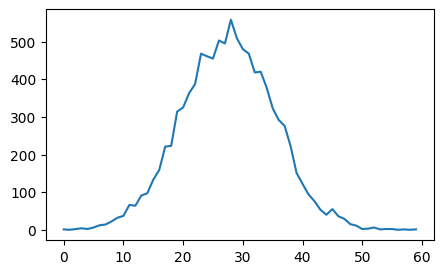

In [64]:

values = np.random.normal(15, 5, 10000)
dist_results,_ = np.histogram(values, bins=60)
plt.plot(dist_results)
plt.show()
np.savetxt('dist.csv', dist_results, delimiter=',')

In [62]:
np.genfromtxt('dist.csv', delimiter=',')

array([  2.,   0.,   1.,   2.,   2.,   6.,   9.,   5.,  14.,  14.,  19.,
        23.,  36.,  54.,  66.,  84., 101., 122., 155., 213., 260., 262.,
       324., 355., 387., 417., 446., 474., 514., 521., 520., 537., 484.,
       453., 458., 355., 421., 371., 292., 246., 194., 173., 151.,  98.,
        94.,  59.,  64.,  41.,  25.,  25.,  15.,  14.,   9.,   3.,   3.,
         1.,   3.,   2.,   0.,   1.])

### Part 1

In [25]:
def plot_dist(dist_method, args):    
    values = dist_method(*args)
    plt.rcParams['figure.figsize'] = [5, 3]
    plt.title(dist_method.__name__ + " distribution")
    plt.hist(values, 100, density=True) 
    plt.show()

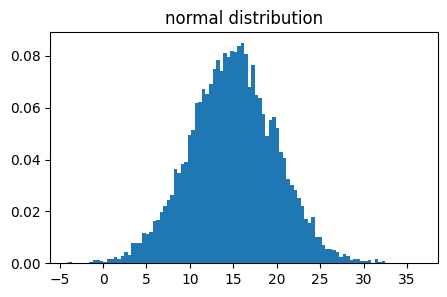

In [26]:
plot_dist(np.random.normal, (15, 5, 10000))

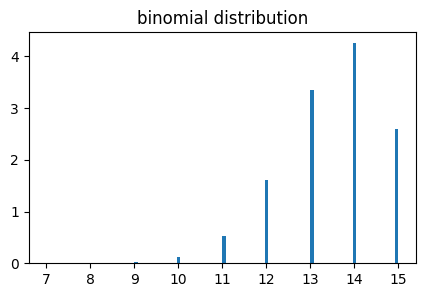

In [27]:
plot_dist(np.random.binomial, (15, .9, 10000))

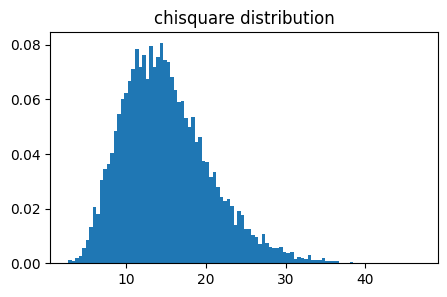

In [28]:
plot_dist(np.random.chisquare, (15, 10000))


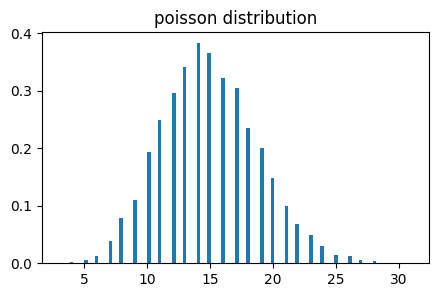

In [29]:
plot_dist(np.random.poisson, (15, 10000))


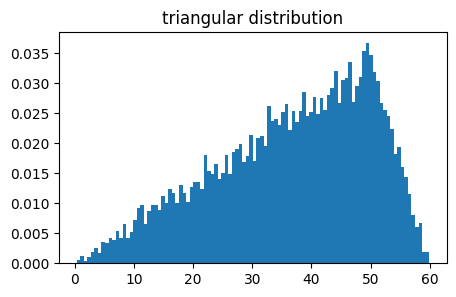

In [30]:
plot_dist(np.random.triangular, (0, 50, 60, 10000))

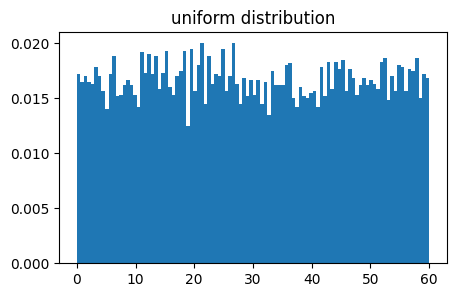

In [31]:
plot_dist(np.random.uniform, (0, 60, 10000))

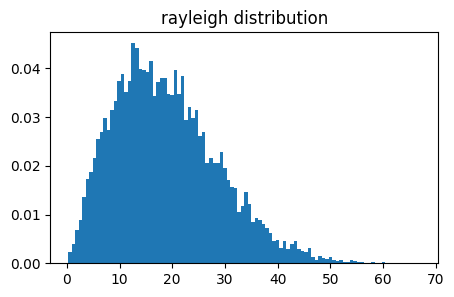

In [32]:
plot_dist(np.random.rayleigh, (15, 10000))

### Part 2

In [33]:
def polyfit(samples, degree=10):
    x, y = np.unique(samples.round(), return_counts=True)
    Y = np.polyfit(x, y, degree)
    f = np.poly1d(Y)
    
    fig, ax = plt.subplots(3,1, figsize=(5,10))
    ax[0].hist(samples, 1000, density=True)
    ax[1].plot(x, y)
    ax[2].plot(x, f(x))

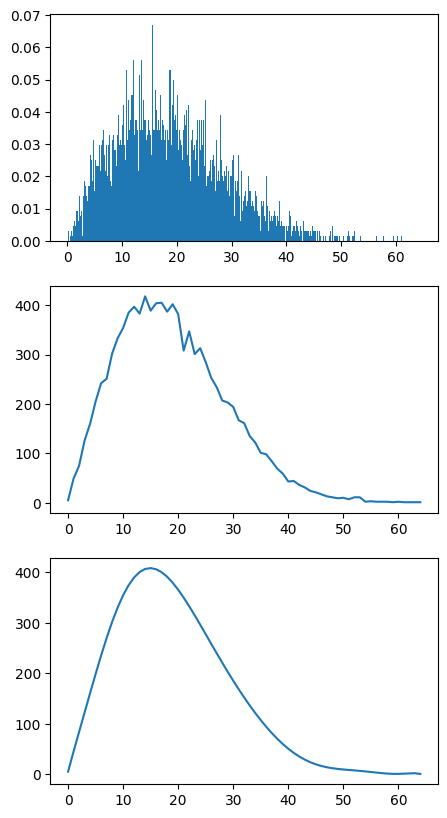

In [34]:
polyfit(np.random.rayleigh(15, 10000))

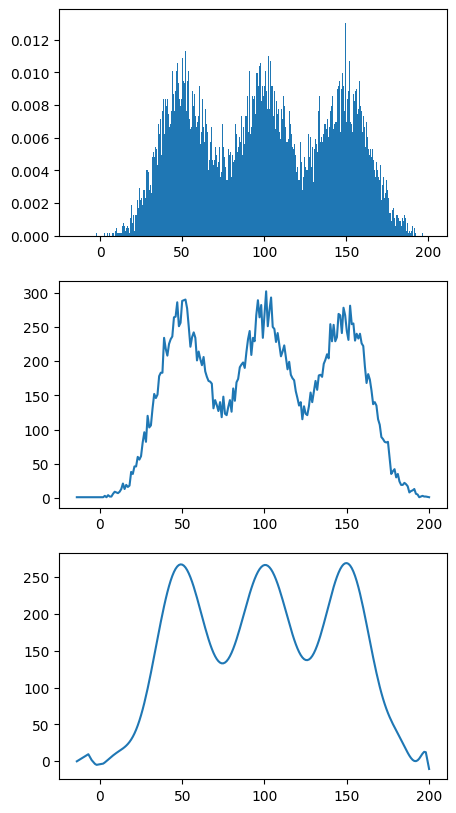

In [35]:
a = np.random.normal(50, 15, 10000)
b = np.random.normal(100, 15, 10000)
c = np.random.normal(150, 15, 10000)

values = np.concatenate((a, b, c))
polyfit(values, 15)

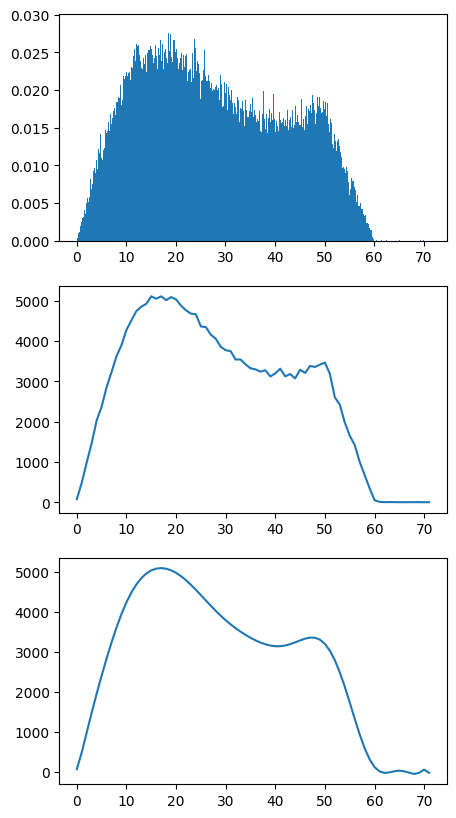

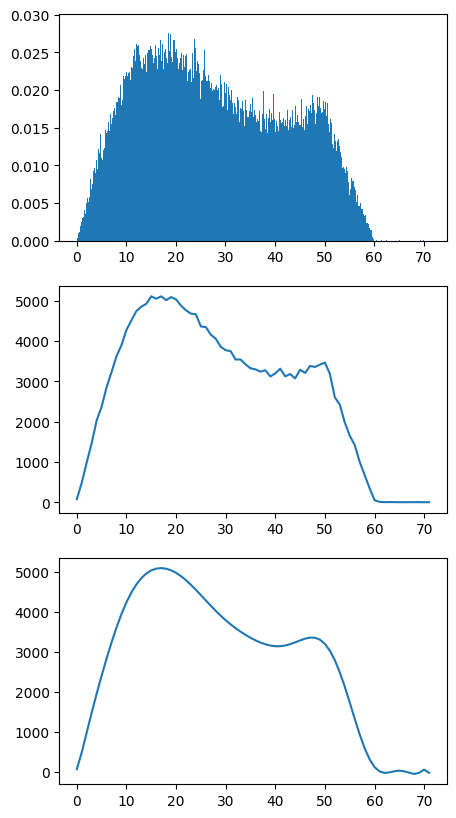

In [37]:
a = np.random.rayleigh(15, 100000)
b = np.random.triangular(0, 50, 60, 100000)

values = np.concatenate((a, b))
polyfit(values, 15)